In [376]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [377]:
#read csv file 
data_csv = pd.read_csv("./real_estate.csv",header = 0)
# data = pd.read_csv("./real_estate.csv",header =None)
data_csv

,transactiondate,age,nearestMRT,nConvenience,latitude,longitude,price
0,2012.917,32.0,84.87882,10.0,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9.0,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5.0,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5.0,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5.0,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0.0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9.0,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7.0,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5.0,24.96674,121.54067,52.5


In [378]:
#Q1. Pre-processing 
#(a)

In [379]:
#Remove any rows of the data that contain a missing (‘NA’) value.
data_temp=data_csv.dropna(axis = 0, how ="any")   #drop all rows that have any NaN values

# List the indices of the removed data points. 
abc= data_csv.count(axis=1)
index = []
for i in range(len(abc)):
    if abc[i]<7:
        index.append(i)
print("The row index list of the removed data points is: ", index)

The row index list of the removed data points is:  [19, 41, 109, 144, 230, 301]


In [380]:
# # deleting all festures from the dataset apart from: age, nearestMRT, nConvenience and price(as labels)
data_features = data_temp.drop(["transactiondate","latitude","longitude"],axis=1)
# Set a new index for data and delete the old index, 
data_new = data_features.reset_index(drop = True)

data_new

,age,nearestMRT,nConvenience,price
0,32.0,84.87882,10.0,37.9
1,19.5,306.59470,9.0,42.2
2,13.3,561.98450,5.0,47.3
3,13.3,561.98450,5.0,54.8
4,5.0,390.56840,5.0,43.1
...,...,...,...,...
403,13.7,4082.01500,0.0,15.4
404,5.6,90.45606,9.0,50.0
405,18.8,390.96960,7.0,40.6
406,8.1,104.81010,5.0,52.5


In [381]:
#Q1. Pre-processing 
# (b) feature normalisation
data_normal = (data_new -data_new.min()) / (data_new.max() -  data_new.min())

In [382]:
print("the mean values over the dataset above are, ")

data_normal.mean()

age             0.406079
nearestMRT      0.162643
nConvenience    0.412010
price           0.277240
dtype: float64

In [383]:
# Q2. Train and Test sets, half 50%-50%

train_data, test_data = np.array_split(data_normal,2)

In [384]:
train_data

,age,nearestMRT,nConvenience,price
0,0.730594,0.009513,1.0,0.275705
1,0.445205,0.043809,0.9,0.314832
2,0.303653,0.083315,0.5,0.361237
3,0.303653,0.083315,0.5,0.429481
4,0.114155,0.056799,0.5,0.323021
...,...,...,...,...
199,0.356164,0.041138,0.5,0.350318
200,0.410959,0.215241,0.1,0.172884
201,0.292237,0.220637,0.3,0.125569
202,0.506849,0.055096,1.0,0.331210


In [385]:
len(train_x.values)

204

In [386]:
test_data

,age,nearestMRT,nConvenience,price
204,0.262557,0.206780,0.1,0.169245
205,0.794521,0.023551,0.8,0.303003
206,0.118721,0.056799,0.5,0.405823
207,0.000000,0.038770,0.1,0.326661
208,0.401826,0.275697,0.2,0.213831
...,...,...,...,...
403,0.312785,0.627820,0.0,0.070974
404,0.127854,0.010375,0.9,0.385805
405,0.429224,0.056861,0.7,0.300273
406,0.184932,0.012596,0.5,0.408553


In [387]:
# train_data.iloc[1,:];  train_data.iloc[-1,:]
# read the first and last rows of training sets
train_top = train_data.head(1)
train_tail = train_data.tail(1)

# test_data.iloc[1,:]; test_data.iloc[-1,:]
#read the first and last rows of test sets
test_top = test_data.head(1)
test_tail = test_data.tail(1) 


In [388]:
print("The first row of training set is: \n ", train_top)
print()
print("The last row of training set is: \n ", train_tail)
print()

print("The first row of test set is: \n ", test_top)
print()
print("The last row of test set is: \n ", test_tail)
print()

The first row of training set is: 
          age  nearestMRT  nConvenience     price
0  0.730594    0.009513           1.0  0.275705

The last row of training set is: 
            age  nearestMRT  nConvenience     price
203  0.878995     0.09926           0.3  0.242038

The first row of test set is: 
            age  nearestMRT  nConvenience     price
204  0.262557     0.20678           0.1  0.169245

The last row of test set is: 
            age  nearestMRT  nConvenience     price
407  0.148402    0.010375           0.9  0.512284



In [389]:
# Q5 Gradient Descent Implementation,GD

c = 2

total_iteration = 400

def plot_differ_lr(x,y,w, tip):
    alphas = [10,5,2, 1,0.5, 0.25,0.1, 0.05, 0.01]
    num = 0
    

    for lr in alphas:
        if tip == 'GD':
            Loss,weight_list = GD_GradientDescent(w,x,y,lr)
        elif tip == 'SGD':
            Loss,weight_list = SGD_Stochastic_Gradient_Descent(w,x,y,lr)
            
        Loss = np.array(Loss).reshape([-1,1])

        if num ==0:
            Loss_list = Loss
            num =1
        else:
            Loss_list = np.hstack([Loss_list,Loss])
    
    #plot
    fig, ax = plt.subplots(3,3, figsize=(10,10))
    for i, ax in enumerate(ax.flat):
        ax.plot(Loss_list[:,i])
        ax.set_title(f"step size: {alphas[i]}")
    plt.tight_layout()      # plot formatting
    plt.show()


def loss_function(w,x,y):
    result = np.sqrt((1/c/c)* pow((y - x@w),2) +1) -1
    result = np.mean(result)
    return result

def calculate_gradient(w,x,y):
    gradient_list =[]
    for i in range(4):
        # np.dot(x,w)
        numerator = x[:,i].reshape([-1,1])* (np.dot(x,w)-y)
        denominator = c * np.sqrt((np.dot(x,w)-y)**2 + c*c ) 
        gradient = np.mean(numerator/denominator)
        gradient_list.append(gradient)
    return gradient_list

def GD_GradientDescent(w,x,y,lr):
    weight_list = w 
    Loss = []
    for i in range(total_iteration):
        w0 =  w[0] - lr* calculate_gradient(w,x,y)[0]
        w1 =  w[1] - lr* calculate_gradient(w,x,y)[1]
        w2 =  w[2] - lr* calculate_gradient(w,x,y)[2]
        w3 =  w[3] - lr* calculate_gradient(w,x,y)[3]
        w= np.array([w0,w1,w2,w3]).reshape([-1,1])
        
        weight_list = np.hstack([weight_list,w])
        loss = loss_function(w,x,y)
        Loss.append(loss)
       
    return Loss, weight_list
    
train_x = train_data[['age','nearestMRT','nConvenience']]
train_y = train_data[['price']]
x = np.hstack([np.ones([len(train_x),1]),train_x.values])
y = train_y.values.reshape([-1,1])
w = np.array([1,1,1,1]).reshape([-1,1])

test_x = test_data[['age','nearestMRT','nConvenience']]
test_y = test_data[['price']]
t_x = np.hstack([np.ones([len(test_x),1]),test_x.values])
t_y = test_y.values.reshape([-1,1])

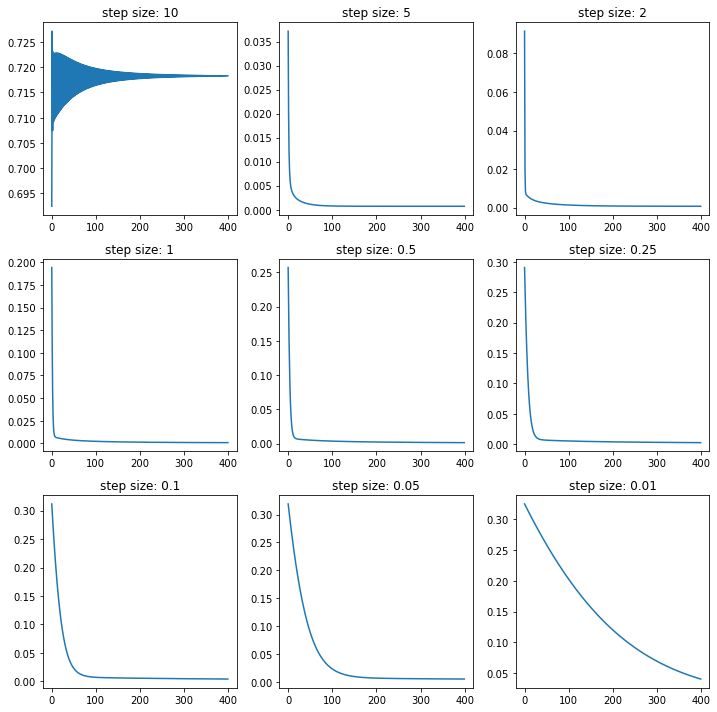

In [391]:
plot_differ_lr(x,y,w, tip = 'GD')

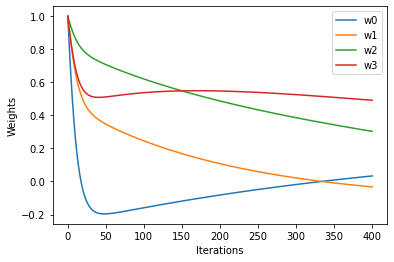

In [405]:
#q5.c
lr_1 = 0.3
Loss,weights = GD_GradientDescent(w,x,y,lr_1)
plt.plot(weights.T)
plt.ylabel('Weights'), plt.xlabel('Iterations'),plt.legend(['w0','w1','w2','w3'])
plt.show()

In [409]:
print("The final weight vector: ", weights[:,-1])
train_loss = loss_function(weights[:,-1].reshape([-1,1]), x,y)
print("Achieved losses on Train sets of GD: ", train_loss)
test_loss = loss_function(weights[:,-1].reshape([-1,1]), t_x,t_y)
print("Achieved losses on Test sets of GD: ", test_loss)

The final weight vector:  [ 0.03361331 -0.03271793  0.30342441  0.49153751]
Achieved losses on Train sets of GD:  0.0020290299313518987
Achieved losses on Test sets of GD:  0.002537420673560057


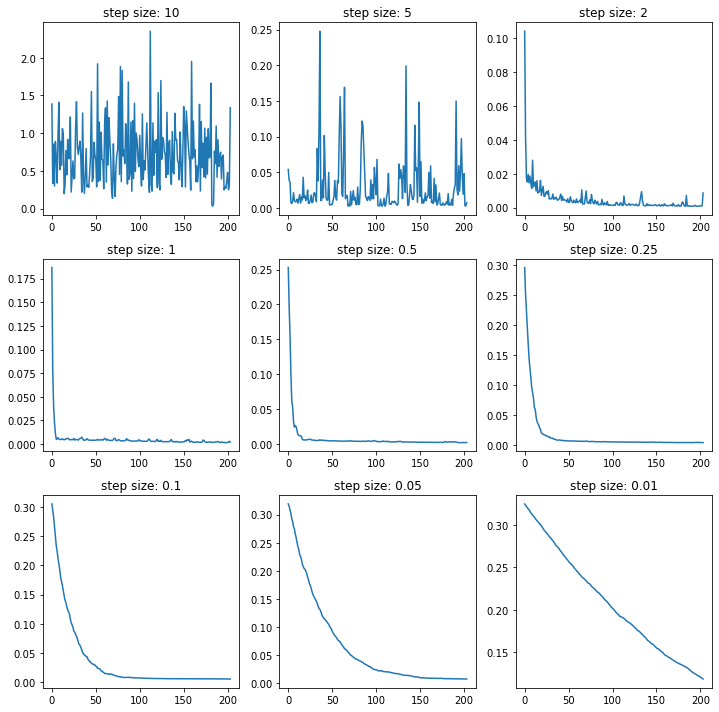

In [410]:
# Q6, Stochastic Gradient Descent Implementation,SGD

Epochs =6 
def SGD_Stochastic_Gradient_Descent(w,x,y,lr):
    weight_list = w
    Loss = []
    data = np.hstack([y,x])
    for i in range(Epochs):
        #permutation,shuffle
        random_data = np.random.permutation(data)
        x_ = random_data[:,1:]
        y_ = random_data[:,0]
        for j in range(len(y_)):
            numerator_part = np.dot(x_[j,:],w)-y_[j]
            denominator = c * np.sqrt((np.dot(x_[j,:],w)-y_[j])**2 + c*c )
            w0=w[0]-lr*x_[j,0]*numerator_part/denominator
            w1=w[1]-lr*x_[j,1]*numerator_part/denominator
            w2=w[2]-lr*x_[j,2]*numerator_part/denominator
            w3=w[3]-lr*x_[j,3]*numerator_part/denominator
            
            w= np.array([w0,w1,w2,w3]).reshape([-1,1])
            weight_list = np.hstack([weight_list,w])
            loss = loss_function(w,x,y)
            Loss.append(loss)
        return Loss, weight_list
plot_differ_lr(x,y,w,tip='SGD')

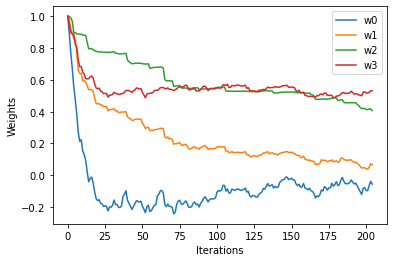

The final weight vector:  [-0.05519493  0.06756619  0.40665064  0.53132909]
Achieved losses on Train sets of SGD:  0.002764771470499451
Achieved losses on Test sets of SGD:  0.003265822022082813


In [415]:
lr_2= 0.4
Loss_2, weight_list_2 = SGD_Stochastic_Gradient_Descent(w,x,y,lr_2)
plt.plot(weight_list_2.T)
plt.ylabel('Weights'), plt.xlabel('Iterations'),plt.legend(['w0','w1','w2','w3'])
plt.show()
weight_last = weight_list_2[:,-1]
print("The final weight vector: ",weight_last)
train_loss = loss_function(weight_last.reshape([-1,1]), x,y)

print("Achieved losses on Train sets of SGD: ", train_loss)
test_loss = loss_function(weight_last.reshape([-1,1]), t_x,t_y)
print("Achieved losses on Test sets of SGD: ", test_loss)